## <center> CS559 Machine Learning: Fundamentals and Applications</center>
<center> Fall 2022 HW5</center>
<center>Due: 12/16/2022 Friday 11:59 PM </center>

Homework assignments will be done individually: each student must hand in their own answers. Use of partial or entire solutions obtained from others or online is strictly prohibited. Electronic submission on Canvas is mandatory.

# Graphical Models (30 pts)

Consider following tables:

let C = random Bernoulli var

||p(C)|
|----|----|
|F|0.65|
|T|0.35|

let R and S also = random Bernoulli vars, conditional on C

|C|p(S=F)|p(S=T)|p(R=F)|p(R=T)|
|--|--|--|--|--|
|F|0.7|0.3|0.8|0.2|
|T|0.8|0.2|0.2|0.8|

let W = random Bernoulli vars, conditional on R and S

|S|R|p(W=T)|p(W=F)|
|-|-|---|---|
|F|F|0.96|0.04|
|T|F|0.15|0.85|
|F|T|0.17|0.83|
|T|T|0.02|0.98|

## Part A
(5 pts) Using pgmpy, draw a conditional directed graph.

In [2]:
import daft
from daft import PGM
import matplotlib.pyplot as plt
%matplotlib inline
from pgmpy.models import BayesianNetwork

In [3]:
def convert_pgm_to_pgmpy(pgm):
    """
    Takes a Daft PGM object and converts it to a pgmpy BayesianModel.

    (Function taken from class notebook).
    """
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianNetwork(edges)
    return model

<Axes:>

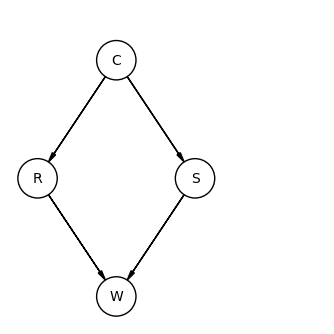

In [4]:
pgm = PGM(shape=[4, 4])

pgm.add_node(daft.Node('C', r"C", 2, 4))
pgm.add_node(daft.Node('R', r"R", 1, 2.5))
pgm.add_node(daft.Node('S', r"S", 3, 2.5))
pgm.add_node(daft.Node('W', r"W", 2, 1))


pgm.add_edge('C', 'R')
pgm.add_edge('C', 'S')
pgm.add_edge('S', 'W')
pgm.add_edge('R', 'W')

pgm.render()

## Part B

(5 pts) Calculate a probability p(C,S,R,W).

$$\begin{equation}\begin{split}
\sum_{S,R\in\{T,F\}}p(C,S,R,W)&=\sum_{S,R\in\{T,F\}}p(C=T|S,R)p(S,R|W)p(W)\\
&=p(C=T|S=T,R=T)p(S=T|R=T)p(W=T)\\
&\,\,+p(C=T|S=T,R=F)p(S=T|R=F)p(W=T)\\
&\,\,+p(C=T|S=F,R=T)p(S=F|R=T)p(W=T)\\
&\,\,+p(C=T|S=F,R=F)p(S=F|R=F)p(W=T)\\
\end{split}\end{equation}$$

In [5]:
joint_probabilities = [
    (0.2 * 0.8 * 0.02),  # P_CtStRtWt
    (0.2 * 0.2 * 0.15),  # P_CtStRfWt
    (0.8 * 0.8 * 0.17),  # P_CtSfRtWt
    (0.8 * 0.2 * 0.96),  # P_CtSfRfWt
    # (0.2 * 0.8 * 0.98),  # P_CtStRtWf
    # (0.2 * 0.2 * 0.85),  # P_CtStRfWf
    # (0.8 * 0.8 * 0.83),  # P_CtSfRtWf
    # (0.8 * 0.2 * 0.04),  # P_CtSfRfWf
]
print(f"Probability: {round(sum(joint_probabilities) * 100, 4)}%.")


Probability: 27.16%.


## Part C
(5 pts) Calculate a probability p(S=T|W=T).

$$\begin{equation}\begin{split}
P(S=T|W=T)&=\frac{P(W=T|S=T)P(S=T)}{P(W=T)}\\
&=\frac{\sum_{C\in\{T,F\}}P(W=T,R,S=T)}{\sum_{S,R\in\{T,F\}}P(W=T,S,R)}
\end{split}\end{equation}$$

In [6]:
# numerator
P_WtStRt = 0.02
P_WtStRf = 0.15
P_WtSt = P_WtStRt + P_WtStRf

P_StCt = 0.3
P_StCf = 0.2
P_St = P_StCt + P_StCf

# denominator
P_WtSfRt = 0.17
P_WtSfRf = 0.96
P_Wt = P_WtStRt + P_WtStRf + P_WtSfRt + P_WtSfRf

# tying it all together!
P_StWt = (P_WtSt * P_St) / (P_Wt)
P_StWt
print(f"Probability: {round(P_StWt * 100, 4)}%.")

Probability: 6.5385%.


## Part D
(10 pts) Using a provided data table, `GM_train.csv`, train a graphical model using `pgmpy.models.BayesianModel` and report the accuracy. The target is W. 

In [7]:
import pandas as pd
from sklearn import metrics

In [8]:
data_train = pd.read_csv("./GM_train.csv")
data_train.head()

,C,S,R,W
0,0,1,1,0
1,0,1,1,0
2,1,1,0,0
3,0,1,1,0
4,1,0,0,1


Training time!

In [9]:
model = convert_pgm_to_pgmpy(pgm)
model.fit(data_train)
print(model.get_cpds("W"))

+------+------+------+---------------------+--------------------+
| R    | R(0) | R(0) | R(1)                | R(1)               |
+------+------+------+---------------------+--------------------+
| S    | S(0) | S(1) | S(0)                | S(1)               |
+------+------+------+---------------------+--------------------+
| W(0) | 0.56 | 0.65 | 0.46153846153846156 | 0.5517241379310345 |
+------+------+------+---------------------+--------------------+
| W(1) | 0.44 | 0.35 | 0.5384615384615384  | 0.4482758620689655 |
+------+------+------+---------------------+--------------------+


Finally, let's get the training accuracy:

In [10]:
y_true = data_train["W"]
y_pred = model.predict(data_train.drop("W", axis=1))

  0%|          | 0/8 [00:00<?, ?it/s]

In [11]:
train_acc = metrics.accuracy_score(y_true, y_pred)
print(f"Train Accuracy: {round(train_acc * 100, 4)}%.")

Train Accuracy: 57.0%.


## Part E
(5 pts) Generalize the model trained in **d** using `GM_test.csv`.

In [12]:
data_test = pd.read_csv("./GM_test.csv")
y_test = data_test["W"]
y_pred = model.predict(data_test.drop("W", axis=1))
test_acc = metrics.accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {round(test_acc * 100, 4)}%.")

  0%|          | 0/8 [00:00<?, ?it/s]

Test Accuracy: 56.0%.


# Handwriting recognition: (70 pts)
Handwriting recognition is a well-studied subject in computer vision and has found wide applications in our daily life (such as USPS mail sorting). In this project, we will explore various machine learning techniques for recognizing handwriting digits. The dataset you will be using is the well-known MINST dataset.

(1)	The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. (http://yann.lecun.com/exdb/mnist/)

(2)	Below is an example of some digits from the MNIST dataset.

![Image of MINST](https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp)

(3)	The goal of this assignment is to build a 10-class classifier to recognize those handwriting digits as accurately as you can.  All the assignments below should use the training data (60K examples) and test data (10 K examples) as given by the dataset.

## Part A
(30 pts) Build several non-deep learning based classifiers using all pixels as features for handwriting recognition. You need to use at least **three techniques** we have learned from the class to do the work.

### Step 1: Load and Standardize the Data

In [27]:
df_train = pd.read_csv("./mnist-in-csv/mnist_train.csv")

df_test = pd.read_csv("./mnist-in-csv/mnist_test.csv")

display(df_train.head())
columns = df_train.columns

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train, X_test = df_train.drop("label", axis=1), df_test.drop("label", axis=1)
X_train /= 255.
X_test /= 255.

y_train, y_test = (
    df_train["label"].values,
    df_test["label"].values
)

### Step 2: Evaluate Classifiers

In [29]:
from sklearn import model_selection

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


# define list of models to try
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
]
# instantiate them
regressors = [
    KNeighborsClassifier(5),
    LinearSVC(random_state=42, C=1.0),  # note: C can be decreased to strength regularization
    RandomForestClassifier(max_depth=5),
]

# init a dict of scoring for each model
model_results = []

# apply each model
for name, model in zip(names, regressors):
    # record the score
    model.fit(X_train, y_train)
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = model.score(X_test, y_test)
    model_results.append(pd.Series({
        "model_type": name,
        "Training": train_accuracy, 
        "Testing": test_accuracy,
    }))
# take a look at the result
df = pd.DataFrame(model_results)
df.head()

/Applications/anaconda3/envs/559/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Applications/anaconda3/envs/559/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

,model_type,Training,Testing
0,Nearest Neighbors,0.981917,0.9688
1,Linear SVM,0.926200,0.9183
2,Decision Tree,0.856900,0.8603


b.	(10 pts) In this assignment, we will explore various techniques related to a neural network with hidden layers of more than 3 to solve the 10-class classification problem.

Since there are many existing implementations to solve the MINST problem, we need to give some twists to this problem to make it worthwhile to do for our final assignment. (Please refer to the ranking list for MNIST at [http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html).

The basic network structure that we are trying to explore is something like the following (i.e., the fully connected deep neural nets). The number of hidden layers and the size of each hidden layer in terms of neurons are left as tuning parameters that you can explore.

![Image of NN](https://pimages.toolbox.com/wp-content/uploads/2022/05/18113202/The-Architecture-of-a-Neural-Network.png)

In [191]:
# Keras Imports
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
# CNN and MLP architecture
from keras.models import Model, Sequential
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    BatchNormalization,
    Conv2D,
    MaxPooling2D,
    Rescaling,
)
from keras.optimizers import SGD
from keras.initializers import RandomNormal
# Keras Callbacks
from keras.callbacks import EarlyStopping, TensorBoard
# Image Preprocessing
from PIL import Image
# Optimizing Hyperparameters
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
# Loading Model from JSON file
from keras.models import model_from_json

Now I'll reload the dataset, but in a Tensorflow-y way:

In [292]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [293]:
y_df_train = df_train["label"]
y_df_train = LabelBinarizer().fit_transform(y_df_train)
y_df_train.shape

(60000, 10)

In [294]:
y_df_test = df_test["label"]
y_df_test = LabelBinarizer().fit_transform(y_df_test)
y_df_test.shape

(10000, 10)

In [309]:
X_df_train = df_train.drop("label", axis=1) / 255.

train_ds = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(tf.expand_dims(
                # np.array([np.newaxis, X_df_train.values]),
                X_df_train.values.reshape(-1, 784),
            1), tf.float32),
            tf.cast(y_df_train.reshape(-1, 1, 10), tf.int32)
        )
    )
)
# optimizes the efficiency of loading training data
train_ds_batches = (
      train_ds.cache().shuffle(500)
      .prefetch(tf.data.AUTOTUNE)).batch(50)


In [310]:
X_df_test = df_test.drop("label", axis=1) / 255.

test_ds = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(tf.expand_dims(
                # X_df_test.values.reshape(-1, 784),
                X_df_test.values.reshape(-1, 784),
            1), tf.float32),
            tf.cast(y_df_test.reshape(-1, 1, 10), tf.int32)
        )
    )
)
# optimizes the efficiency of loading training data
test_ds_batches = (
      test_ds.cache().shuffle(500)
      .prefetch(tf.data.AUTOTUNE)).batch(50)

Let's create a validation set (to make the training easier to monitor):

In [311]:
def is_validation(image, _):
    '''marks every 10th sample a part of the validation data'''
    return image % 10 == 0

def is_not_validation(image, _):
    '''puts everything back in the train set, that should be there'''
    return not is_validation(image, _)


def recover_label(_, label):
    return label


val_ds = (
    train_ds_batches.enumerate().filter(is_validation) \
    .map(recover_label)
)

train_ds_batches = (
    train_ds_batches.enumerate().filter(is_not_validation) \
    .map(recover_label)
)

2022-12-04 14:47:49.828266: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2022-12-04 14:47:49.912252: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


Let's add some helper functions to make the code less repetitive:

In [312]:
# Helper functions to Reduce Repetition
def add_conv_layer(model, layer_size, needs_input, kernel_size=None, pool_size=None):
    """Add a Keras convolutional layer to the model, along with MaxPooling.
       Will specify input shape as well if needed.
       
       Parameters:
       model(Model): Neural network in Keras
       layer_size(int): number of neurons to go in layer
       need_input(bool): signals if the convolutional layer needs to specify
                         the dimensions of the input
       kernel_size(tuple): specifies a square matrix to use for kernel dimensions
       pool_size(tuple): specifies a square matrix to use in pooling
       
       Returns: None
       
    """
    # set kernel and pool size
    if kernel_size is None:
        kernel_size = (3, 3)
    if pool_size is None:
        pool_size = (2, 2)
    # specify input dimension for 1st conv layer
    if needs_input is True:
        conv_layer = Conv2D(layer_size,
                            kernel_size=kernel_size,
                            activation='relu',
                            input_shape=(...))

    else:
        # otherwise all other convolutional layers don't need it
        conv_layer = Conv2D(layer_size,
                            kernel_size=kernel_size,
                            activation='relu')
    # add Convolutional layer
    model.add(conv_layer)  
    # add MaxPooling layer
    model.add(MaxPooling2D(pool_size=pool_size))  # no learning params
    return None


def add_dense_layer(model, layer_size, is_output, drop_rate):
    """Add a multi-layer perceptron to the model
       Will specify 'sigmoid' for the final layer.
       
       Parameters:
       model(Model): Neural network in Keras
       layer_size(int): number of neurons to go in layer
       is_output(bdool): signals if the MLP is the last layer
       drop_rate(float): percentage of connections in Dense layer
                       to cut off
       
       Returns: None
       
    """
    # specify activation function
    activation = 'relu' if is_output is False else 'softmax'
    # add MLP
    model.add(Dense(layer_size, activation=activation)) 
    # Add Dropout layer and Batch Normalization
    # else:
    if is_output is False:
        # model.add(Dense(layer_size, activation=activation)) 
        model.add(BatchNormalization())
        model.add(Dropout(drop_rate))
    return None


def compile_model(model, optimizer=None):
    """Compile the neural network.
    
       Parameter:
       model(keras.Sequential or keras.Model): the model object
       optimizer(str): specfies the algoritm used to minimize loss
       
       Returns: None
       
    """
    # set the optimizer
    if optimizer is None:
        optimizer = 'adam'
    # compile the model
    model.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=optimizer,
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])
    return None


def define_model(units, conv_layers, dense_layers, dropout, num_classes=10):
    """Define a Sequential model in Keras.
    
       Parameters:
       units(int): number of neurons to go in a layer
       conv_layers(int): number of convolutional layers
       dense_layers(int): number of MLP
       dropout(float): percentage of connections in Dense layer
                       to cut off
                       
       Returns: tf.keras.Sequential: the neural network to train
    
    """
    # Instaniate model
    model = Sequential()
    # Add CNN layers
    if conv_layers > 0:
        add_conv_layer(model, units, True)
        for _ in range(conv_layers - 1):
            # add convolutional layers that come after the 1st
            add_conv_layer(model, units, False)
    # Flatten the data
    if conv_layers > 0:
        model.add(Flatten())
    else:  # if no flattening, tell the model what input shape to expect
        model.add(keras.layers.InputLayer(input_shape=(1, 784)))
    # Add MLP Layers
    for _ in range(dense_layers - 1):
        add_dense_layer(model, units, False, dropout)
    # add final MLP, for output
    add_dense_layer(model, num_classes, True, dropout)
    # Compile Model
    compile_model(model)
    return model


def train_model(model, train_ds, val_ds,
                epochs, callbacks):
    """Train the Keras model.
       
       Parameters:
       model(keras.Sequential or keras.Model): the model object
       train_ds(tf.Dataset): subsection of the dataset for training
       val_ds(tf.Dataset): subsection of the dataset for validation
       epochs(int): number of forward and back passes for the entire
                    dataset through the model
       callbacks(List): special Keras functions to improve models
       
       returns: History.history: a dict containing metrics about model
       
    """
    # train the model
    history = model.fit(x=train_ds,
                        epochs=epochs,
                        validation_data=val_ds,
                        callbacks=callbacks)
    return history


Now, let's try out a few quick 'n dirty model  to finally get things moving:

In [313]:
import time

In [314]:
# Choices for the Model Architecture - values arbitrary
dense_layers = [6, 5, 4]
layer_sizes = [16, 32, 64]
conv_layers = [0]  # for right now, I don't want any convolutions

# try different combinations!
for num_fc_layer in dense_layers:
    for size in layer_sizes:
        for num_conv_layers in conv_layers:
            # name the combo - based on it's architecture, and when it was run
            NAME = (
                f'{num_conv_layers}-conv-{size}-nodes' +
                f'-{num_fc_layer}-dense_layers' + 
                f'-{int(time.time())}'
            )
            # Instantiate TensorBoard to visualize model performance
            tensorboard = TensorBoard(log_dir=f'./Graph/{NAME}')
            # Define Model
            model = define_model(size, num_conv_layers, num_fc_layer, 0.2)
            # Train the Model (using a generator!)
            epochs, batch_size = 20, 20
            history = train_model(model, train_ds_batches,
                                  val_ds, epochs, [tensorboard])

Epoch 1/20
1080/1080 [==============================] - 9s 4ms/step - loss: 1.5117 - accuracy: 0.4761 - precision_57: 0.7620 - recall_57: 0.2440 - val_loss: 0.6270 - val_accuracy: 0.7717 - val_precision_57: 0.8452 - val_recall_57: 0.6587
Epoch 2/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.9062 - accuracy: 0.6935 - precision_57: 0.8006 - recall_57: 0.5592 - val_loss: 0.4060 - val_accuracy: 0.8862 - val_precision_57: 0.9148 - val_recall_57: 0.8610
Epoch 3/20
1080/1080 [==============================] - 5s 5ms/step - loss: 0.7447 - accuracy: 0.7721 - precision_57: 0.8340 - recall_57: 0.6932 - val_loss: 0.3761 - val_accuracy: 0.8957 - val_precision_57: 0.9117 - val_recall_57: 0.8862
Epoch 4/20
1080/1080 [==============================] - 6s 6ms/step - loss: 0.6627 - accuracy: 0.8095 - precision_57: 0.8563 - recall_57: 0.7527 - val_loss: 0.3018 - val_accuracy: 0.9118 - val_precision_57: 0.9244 - val_recall_57: 0.9027
Epoch 5/20
1080/1080 [==========================

### Part C
(30 pts) This assignment reflects the data collection process.
- Hand write 5 styles of your own digits from 0 to 9 on a paper, and make sure your own handwritings are for sure recognizable by yourself. Please take a picture of each digit you write (so you have total 5 x 10 = 50 images), resize and convert it to the same data input format as the MNIST dataset. In other words, you have 50 new data points with labels.
- Treat these 50 images as “brand-new” test dataset and run your own ML models from Question a and b on these 50 images and report the achieved test accuracy. Note, the goal for this exercise is not for achieving “high” accuracy, but to show what potential gaps there may be between existing MNIST dataset and your own test dataset, a scenario you would encounter in real life.
- Use the following code for the image loading. 


In [ ]:
#Import the Photos
from matplotlib import pyplot as plt
import cv2
import os

rootdir = 

def read_img(img_path):
    img = cv2.imread(img_path)
    x_img = np.array([0] * 784)


    for i in range(28):
        for j in range(28):
            idx = i * 28 + j
            x_img[idx] = 255 - img[i][j][0]
            
    return x_img, img
    
X_mydigits = []
Y_mydigits = []
digit_imgs = []

# read handwritten digits
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(subdir, file)
            digit, img = read_img(path)
            label = int(os.path.splitext(subdir)[0][-1])
            X_mydigits.append(digit)
            Y_mydigits.append(label)
            digit_imgs.append(img)


X_mydigits = np.array(X_mydigits)
Y_mydigits = np.array(Y_mydigits)

In [ ]:
#Showing all my images
temp_img = ''
for i in range(5):
    hor = ''
    for j in range(10):
        idx = i*10 + j
        img = digit_imgs[idx]
        if j == 0:
            hor = img
        else:
            hor = np.hstack((hor, img))
    if i == 0:
        temp_img = hor
    else:
        temp_img = np.vstack((temp_img, hor))

plt.imshow(temp_img)
plt.axis('off')
plt.show()

d.	In submission, the following is required for this assignment 
- Show all 50 images you create with the corresponding labels you intend to assign, 
- Make a table to show the test accuracy on these 50 images for each ML model you obtained from questions a to c.
- Submit in a subfolder with your 50 handwriting dataset in MNIST format. 
